In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Generate syntetic data
Use make_blobs() to generate synthetic clusters
Seed the function to make this exercise deterministic

In [6]:
features, true_labels = make_blobs(
n_samples=200,
centers=3,
cluster_std=2.75,
random_state=42)

Now, standardize the data using standardization to make all columns have a mean=0 and std=1

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Kmeans estimator, you set in advance the algorithm parameters before fitting the algorithm to the data

In [9]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

Now, we can fit the data in `scaled_features`

In [10]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Let's examine the output.

In [13]:
kmeans.inertia_ # Lowest SSE

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
kmeans.n_iter_

2

Let's check the cluster assignments

In [16]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

Compare the true clusters, see that the labels used are different. This depends on the initialization, but what it matters is that the cluster assignation stays the same

In [18]:
true_labels[:5]

array([1, 0, 2, 2, 2])

Now, that you have seen the basic functionality. Let's see two methods to select the appropiate number of clusters in the initialization

## The elbow method
run several k-means, increment k with each iteration, and record the SSE:

In [20]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42}

#A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_features)
   sse.append(kmeans.inertia_)

Plot the SSE (should be minimised) vs number of clusters

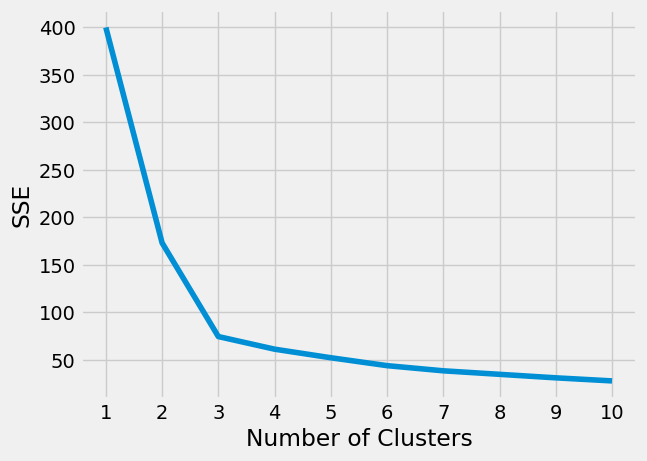

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow point is 3, where we have the better trade-off between number of clusters and SSE

Sometimes, it is difficult to locate the elbow programmatically. We can use the kneed algorithm for that

In [22]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

## Silhouette coefficient

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:

In [24]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

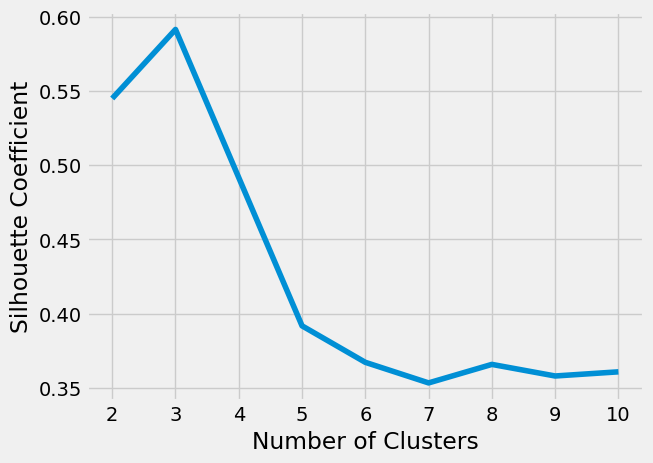

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

We plot the silhouette coefficient and we see that the best score is obtained for number of clusters=3